# Cloud removal Analisys

In [2]:
import random
from pathlib import Path

import pandas as pd

from utils.plots import (
    plot_monthly_water,
    plot_tif,
    plot_water_over_time,
    plot_water_x_cloud_percent,
    plot_water_x_cloud_percent_filter,
    plot_water_x_cloud_percent_over_time,
    plot_year_x_variable,
)
from utils.water import calculate_water_area



In [3]:
root = Path("../data/02_boa_images/sume")
metadata_path = root / 'metadata' / 'sentinel_6B_BOA_S2_SR_sume.csv'

In [4]:
root.resolve(), metadata_path.resolve()

(WindowsPath('C:/Users/weverton.vitor/Documents/faculdade/pibic/fmask-pipeline/data/02_boa_images/sume'),
 WindowsPath('C:/Users/weverton.vitor/Documents/faculdade/pibic/fmask-pipeline/data/02_boa_images/sume/metadata/sentinel_6B_BOA_S2_SR_sume.csv'))

In [5]:
metadata = pd.read_csv(metadata_path.resolve())
metadata = metadata[['PRODUCT_ID', 'image_id', "location_name", 'file_name', 'CLOUDY_PIXEL_PERCENTAGE', 'CLOUD_COVERAGE_ASSESSMENT']]
metadata['water_mask_image_path'] = metadata.apply(lambda x: x['file_name'].replace('02_boa_images', '07_water_masks'), axis=1)
metadata['date'] = metadata.apply(lambda x: Path(x['file_name']).name.split('_')[-1].split('.')[0], axis=1)
metadata['year'] = metadata['date'].apply(lambda date: int(f"{date[:4]}"))
metadata['month'] = metadata['date'].apply(lambda date: int(f"{date[4:6]}"))
metadata['day'] = metadata['date'].apply(lambda date: int(f"{date[6:]}"))

metadata.head()

,PRODUCT_ID,image_id,location_name,file_name,CLOUDY_PIXEL_PERCENTAGE,CLOUD_COVERAGE_ASSESSMENT,water_mask_image_path,date,year,month,day
0,S2B_MSIL2A_20180106T125259_N0500_R052_T24MYS_2...,COPERNICUS/S2_SR_HARMONIZED/20180106T125259_20...,sume,C:\Users\weverton.vitor\Documents\faculdade\pi...,32.785767,32.785767,C:\Users\weverton.vitor\Documents\faculdade\pi...,20180106,2018,1,6
1,S2A_MSIL2A_20180531T125311_N0500_R052_T24MYS_2...,COPERNICUS/S2_SR_HARMONIZED/20180531T125311_20...,sume,C:\Users\weverton.vitor\Documents\faculdade\pi...,86.369771,86.369771,C:\Users\weverton.vitor\Documents\faculdade\pi...,20180531,2018,5,31
2,S2A_MSIL2A_20181217T125301_N0211_R052_T24MYS_2...,COPERNICUS/S2_SR_HARMONIZED/20181217T125301_20...,sume,C:\Users\weverton.vitor\Documents\faculdade\pi...,80.338374,80.338374,C:\Users\weverton.vitor\Documents\faculdade\pi...,20181217,2018,12,17
3,S2B_MSIL2A_20181222T125309_N0211_R052_T24MYS_2...,COPERNICUS/S2_SR_HARMONIZED/20181222T125309_20...,sume,C:\Users\weverton.vitor\Documents\faculdade\pi...,27.804513,27.804513,C:\Users\weverton.vitor\Documents\faculdade\pi...,20181222,2018,12,22
4,S2A_MSIL2A_20181227T125301_N0211_R052_T24MYS_2...,COPERNICUS/S2_SR_HARMONIZED/20181227T125301_20...,sume,C:\Users\weverton.vitor\Documents\faculdade\pi...,0.010100,0.010100,C:\Users\weverton.vitor\Documents\faculdade\pi...,20181227,2018,12,27


In [6]:
metadata["file_name_clean"] = metadata["file_name"].apply(
    lambda x: x.replace("02_boa_images", "04_clean_images").replace(
        ".tif", "_clean.tif"
    )
)
metadata["water_mask_image_path_fmask"] = metadata[
    "water_mask_image_path"
].apply(
    lambda x: x.replace(".tif", "_clean.tif").replace("sume", "sume_deepwatermap_fmask", 1)
)
metadata["water_mask_image_path"] = metadata[
    "water_mask_image_path"
].apply(lambda x: x.replace("sume", "sume_deepwatermap_no_preprocess", 1))


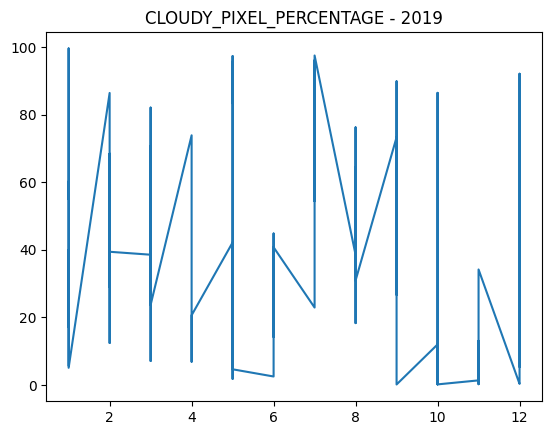

In [7]:
plot_year_x_variable(data=metadata, year=2019)

## Cloud distribution 

<Axes: >

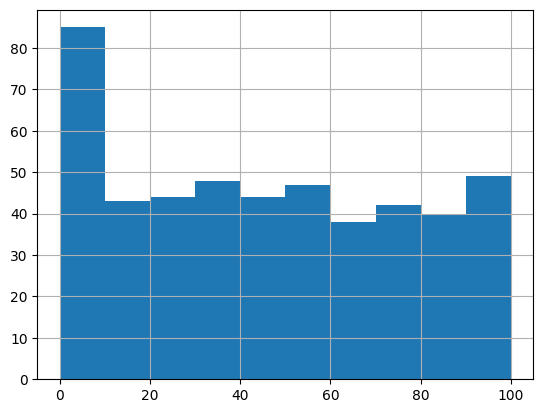

In [8]:
metadata['CLOUDY_PIXEL_PERCENTAGE'].hist()

## Water Area of DeepWaterMap Without Cloud  Removal

C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\02_boa_images\sume\2019\sentinel_6B_BOA_S2_SR_sume_20190307.tif
C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\07_water_masks\sume_deepwatermap_no_preprocess\2019\sentinel_6B_BOA_S2_SR_sume_20190307.tif
Água(m^2): 27374664.052817788
Água(km^2): 27.37466405281779


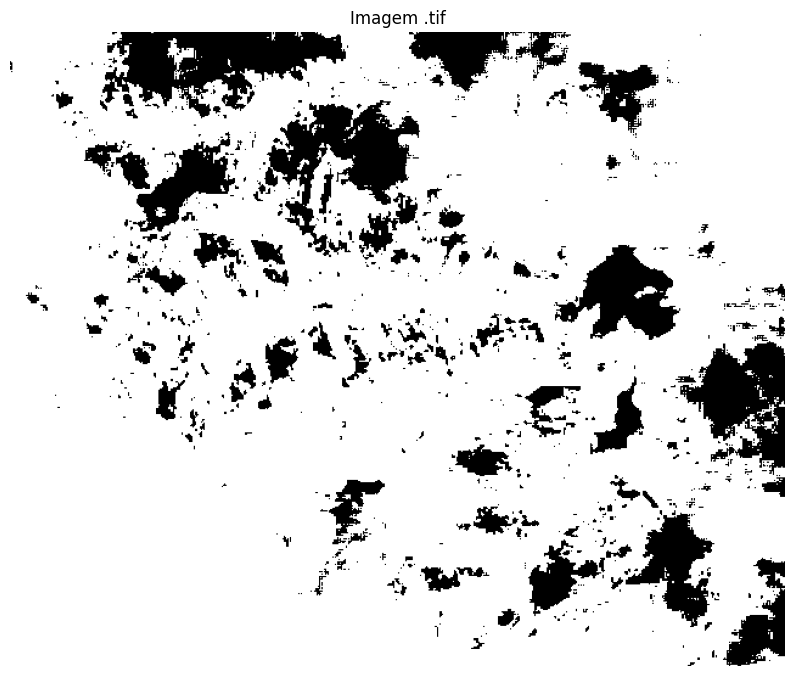

In [9]:
images = metadata['file_name']
images_water_mask = metadata['water_mask_image_path']
rand = random.randint(0, len(images))

m2, km2 = calculate_water_area(images_water_mask[rand])
print(images[rand])
print(images_water_mask[rand])
print(f"Água(m^2): {m2}")
print(f"Água(km^2): {km2}")
plot_tif(images_water_mask[rand])

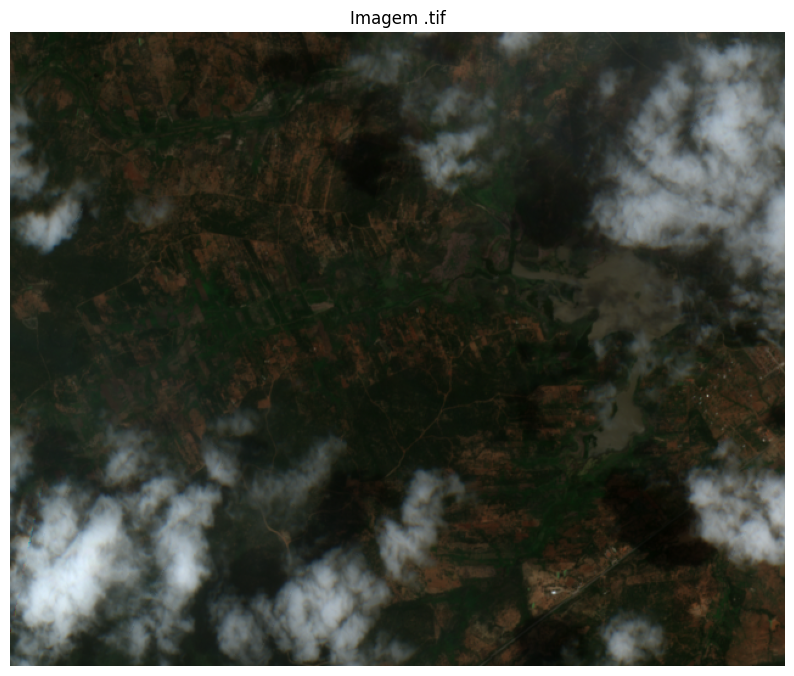

In [10]:
plot_tif(images[rand], bandas=[4, 3, 2])

### Water Area For Many Scenes

In [11]:
m2_areas = []
km2_areas = []
for index, row in metadata.iterrows():
    m2, km2 = calculate_water_area(row['water_mask_image_path'])
    m2_areas.append(m2)
    km2_areas.append(km2)

metadata['m2_area'] = pd.Series(m2_areas)
metadata['km2_area'] = pd.Series(km2_areas)

In [12]:
metadata["m2_area"]

0      1.565032e+06
1      3.232823e+07
2      1.037368e+07
3      1.126460e+06
4      1.379619e+06
           ...     
475    2.122246e+07
476    2.751695e+07
477    2.458057e+07
478    2.234665e+07
479    2.548243e+07
Name: m2_area, Length: 480, dtype: float64

In [13]:
metadata["km2_area"]

0       1.565032
1      32.328235
2      10.373677
3       1.126460
4       1.379619
         ...    
475    21.222457
476    27.516949
477    24.580569
478    22.346652
479    25.482427
Name: km2_area, Length: 480, dtype: float64

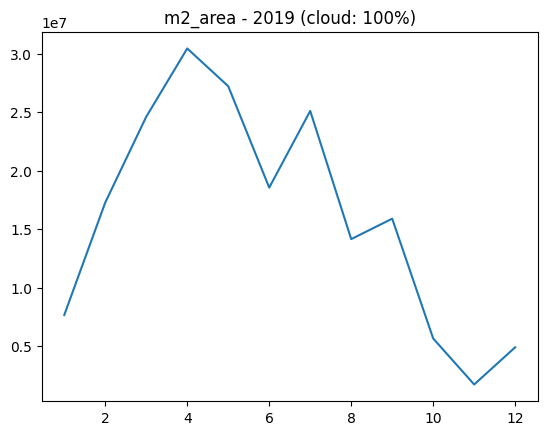

In [14]:
plot_water_x_cloud_percent_filter(data=metadata, year=2019, y_varible="m2_area", cloud_percent=100)

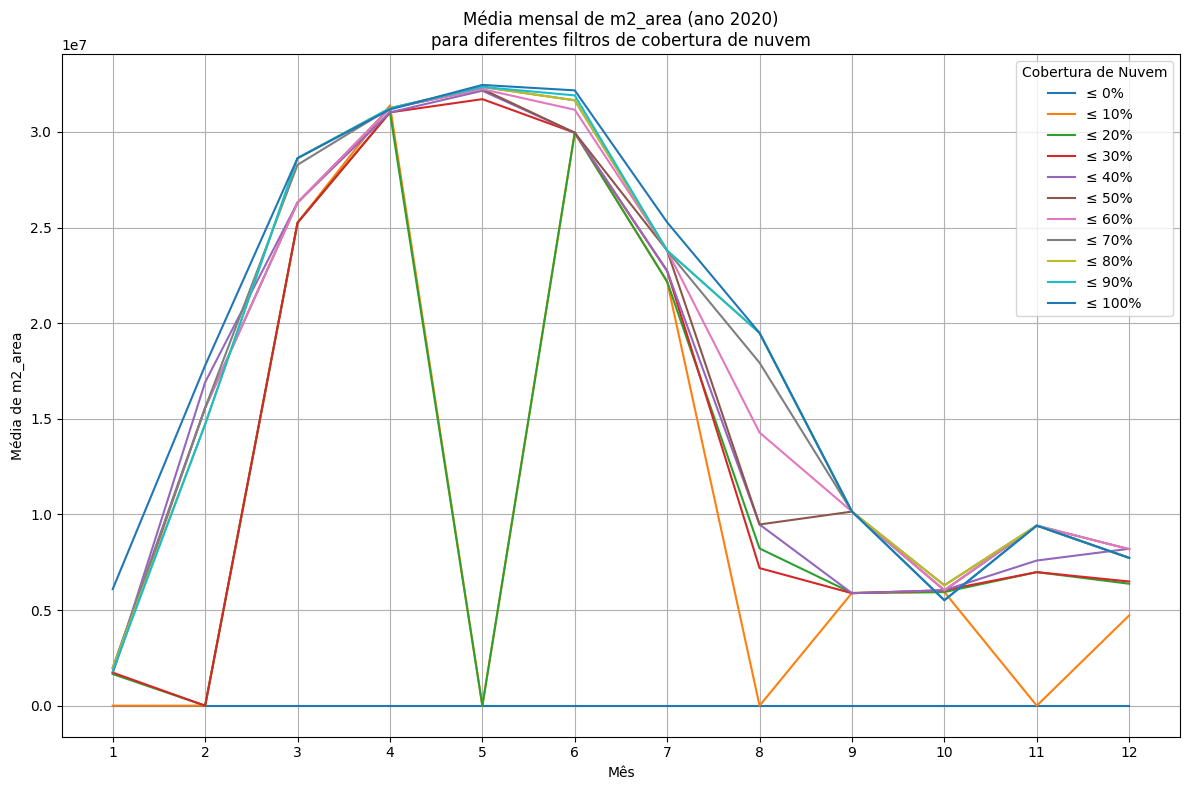

In [15]:
plot_water_x_cloud_percent(metadata, year=2020, y_variable='m2_area')


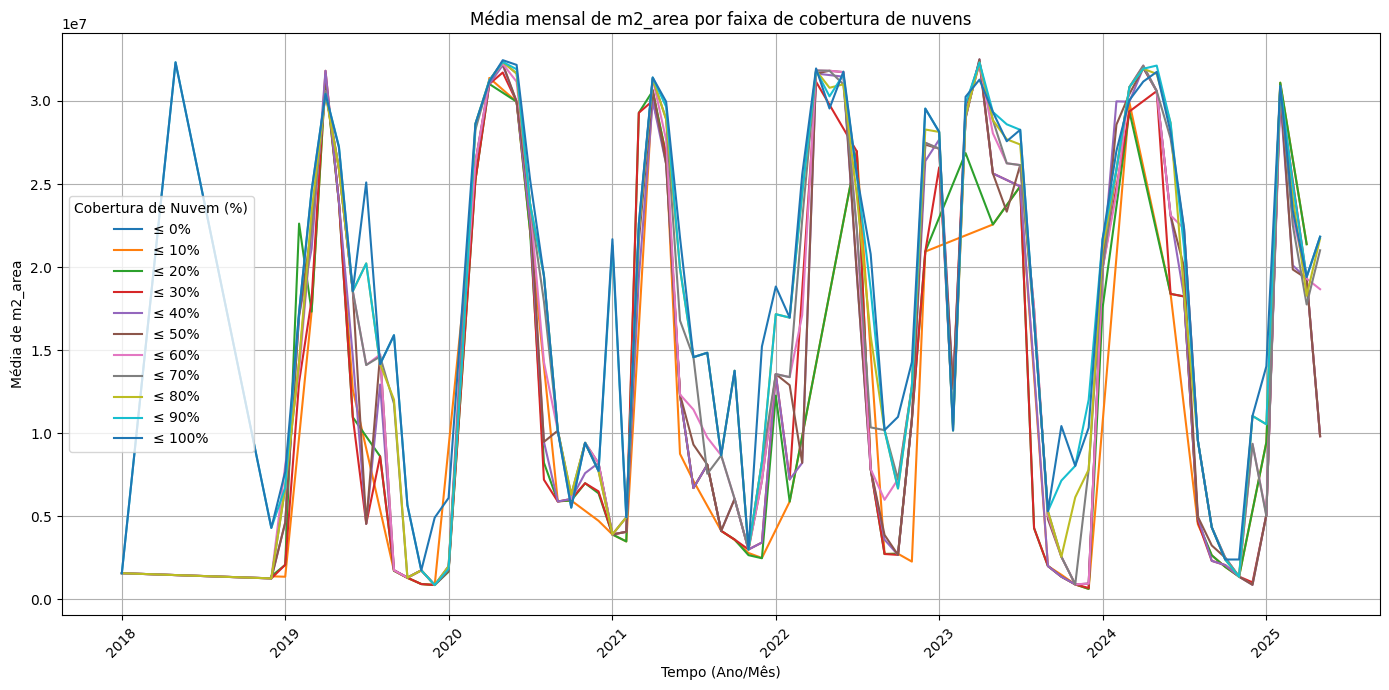

In [16]:
plot_water_x_cloud_percent_over_time(metadata, y_variable='m2_area')

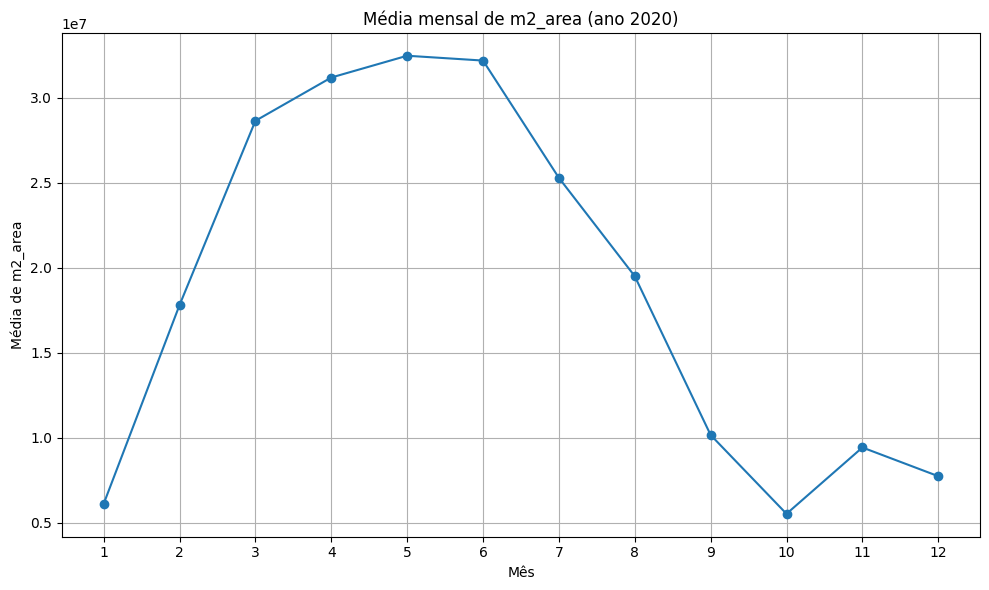

In [17]:
plot_monthly_water(metadata, year=2020, y_variable='m2_area')

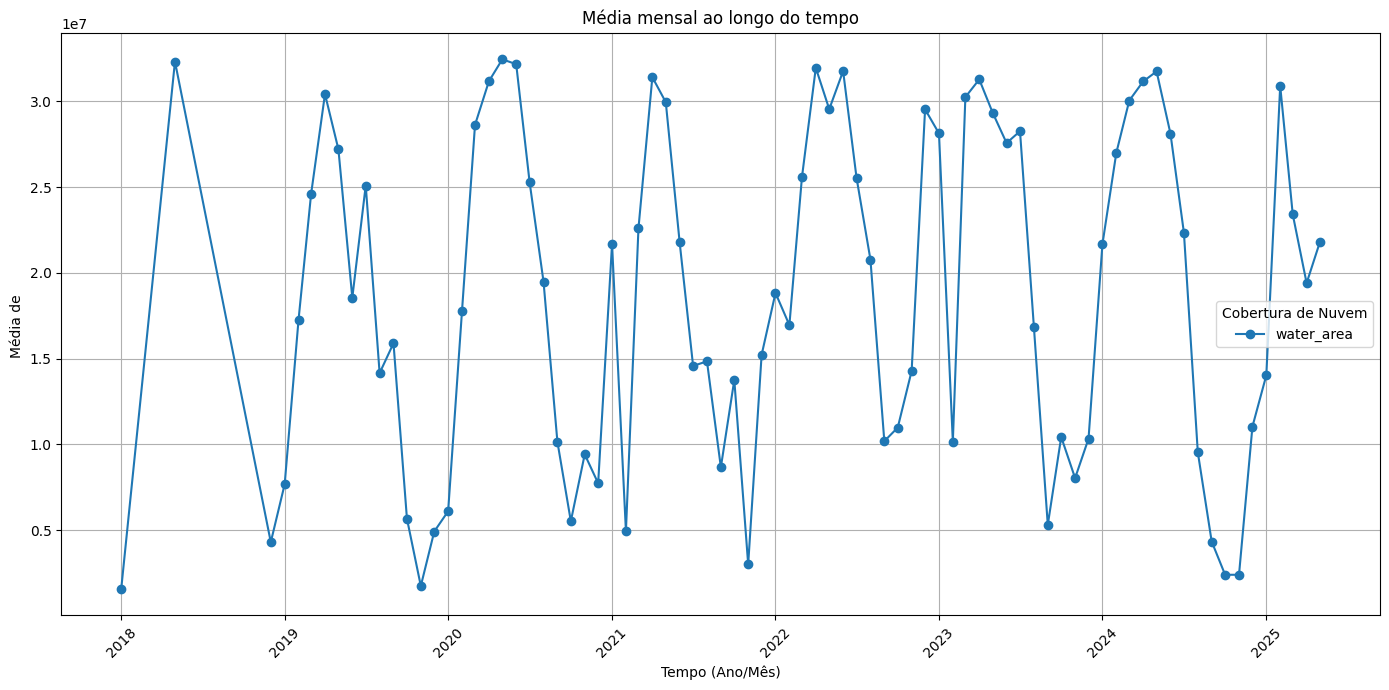

In [18]:
plot_water_over_time(metadata, y_variables=['m2_area'])

## Water Area of DeepWaterMap With Cloud Removal

C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\04_clean_images\sume\2022\sentinel_6B_BOA_S2_SR_sume_20220604_clean.tif
C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\07_water_masks\sume_deepwatermap_fmask\2022\sentinel_6B_BOA_S2_SR_sume_20220604_clean.tif
Água(m^2): 29645210.61207999
Água(km^2): 29.64521061207999


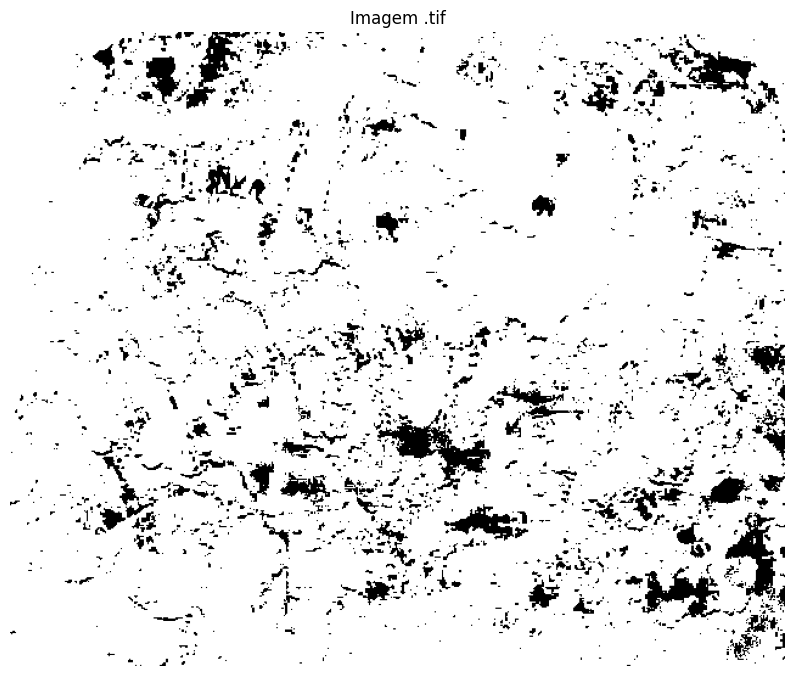

In [19]:
images = metadata['file_name_clean']
images_water_mask = metadata['water_mask_image_path_fmask']
rand = random.randint(0, len(images))

m2, km2 = calculate_water_area(images_water_mask[rand])
print(images[rand])
print(images_water_mask[rand])
print(f"Água(m^2): {m2}")
print(f"Água(km^2): {km2}")
plot_tif(images_water_mask[rand])

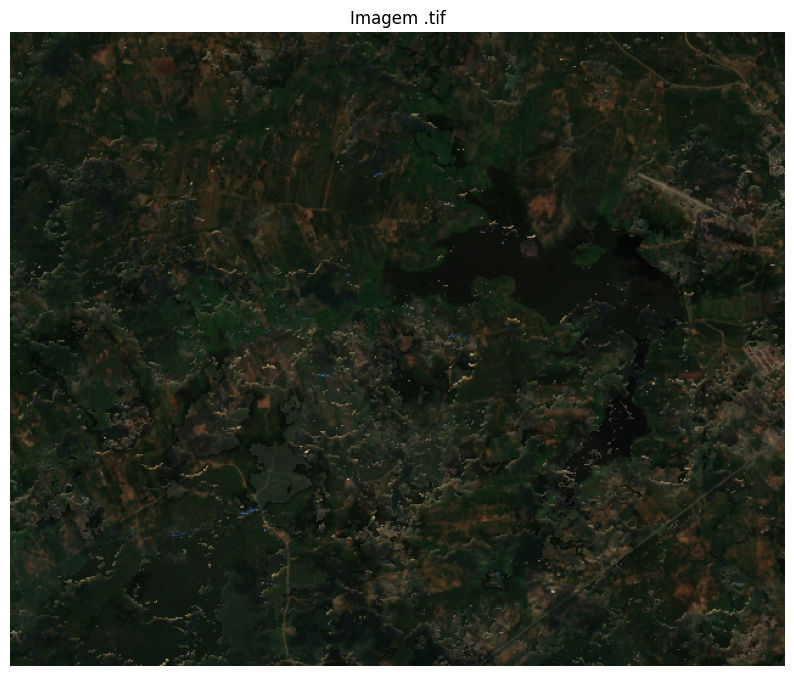

In [20]:
plot_tif(images[rand], bandas=[4, 3, 2])

### Water Area For Many Scenes

In [21]:
m2_areas = []
km2_areas = []
for index, row in metadata.iterrows():
    try:
        m2, km2 = calculate_water_area(row['water_mask_image_path_fmask'])
        m2_areas.append(m2)
        km2_areas.append(km2)
    except:
        print(f"Error to calculate water area of {row['water_mask_image_path_fmask']}")

metadata['m2_area_fmask'] = pd.Series(m2_areas)
metadata['km2_area_fmask'] = pd.Series(km2_areas)

Error to calculate water area of C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\07_water_masks\sume_deepwatermap_fmask\2018\sentinel_6B_BOA_S2_SR_sume_20180106_clean.tif
Error to calculate water area of C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\07_water_masks\sume_deepwatermap_fmask\2018\sentinel_6B_BOA_S2_SR_sume_20180531_clean.tif
Error to calculate water area of C:\Users\weverton.vitor\Documents\faculdade\pibic\fmask-pipeline\data\07_water_masks\sume_deepwatermap_fmask\2018\sentinel_6B_BOA_S2_SR_sume_20181217_clean.tif


In [22]:
metadata[["m2_area_fmask", "km2_area_fmask"]]

,m2_area_fmask,km2_area_fmask
0,1.161022e+06,1.161022
1,1.260868e+06,1.260868
2,1.506444e+06,1.506444
3,1.506444e+06,1.506444
4,1.504081e+06,1.504081
...,...,...
475,7.980047e+06,7.980047
476,7.768245e+06,7.768245
477,NaN,NaN
478,NaN,NaN


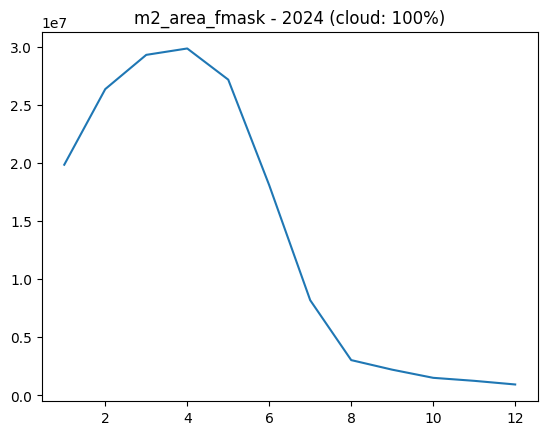

In [23]:
plot_water_x_cloud_percent_filter(data=metadata, year=2024, y_varible="m2_area_fmask", cloud_percent=100)

In [24]:
plot_monthly_water(metadata, year=2020, y_variables=['m2_area_fmask'])

TypeError: plot_monthly_water() got an unexpected keyword argument 'y_variables'

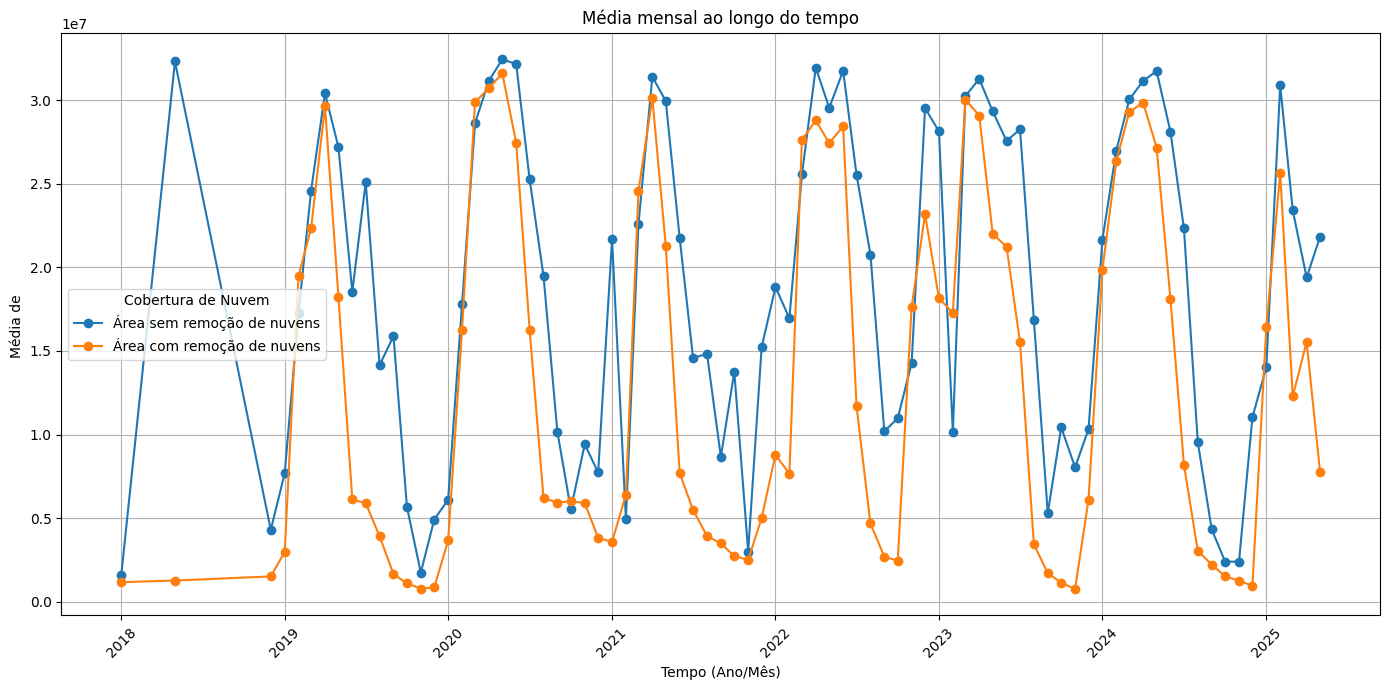

In [ ]:
plot_water_over_time(metadata, y_variables=['m2_area', 'm2_area_fmask'], labels=['Área sem remoção de nuvens', 'Área com remoção de nuvens'])

## Compare